Notebook for routine to plot Tromsøflaket region as contour map

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import netCDF4 as nc
import utm
import cmocean
from scipy import interpolate
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.image as mpimg
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

import sb_tools

In [2]:
bathy_df = pd.read_csv('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/NordNorgeTopo.txt',sep='\s+', header=None,names=['x','y','bathy'], )

In [3]:
# Find extent index values
lon_min = 15.50
lon_max = 20.6
lat_min = 66.5
lat_max = 72.30

[easting_min, northing_min, num, let] = utm.from_latlon(lat_min, lon_min)
[easting_max, northing_max, num, let] = utm.from_latlon(lat_max, lon_max)
print(easting_min, northing_min,easting_max, northing_max)

522247.9178807849 7375732.303536423 689786.5592437562 8031239.517891513


In [4]:
ind_values = np.where((np.array(bathy_df.x)>easting_min)&(np.array(bathy_df.x)<easting_max)&(np.array(bathy_df.y)>northing_min)&(np.array(bathy_df.y)<northing_max))


ind = 0
index_subset = ind_values[0][0::100]
pts = np.zeros([np.size(index_subset),2])

for i in index_subset:
    pts[ind,:] = utm.to_latlon(bathy_df.x[i],bathy_df.y[i],33,zone_letter='W')
    ind += 1
lats  = pts[:,0]
lons = pts[:,1]

bathy = np.array(bathy_df.bathy[index_subset])

In [5]:
x = np.arange(np.min(lons),np.max(lons),0.01)
y = np.arange(np.min(lats),np.max(lats),0.01)
X, Y = np.meshgrid(x, y)
Z = interpolate.griddata((lons,lats), bathy, (X,Y) ,method='linear')


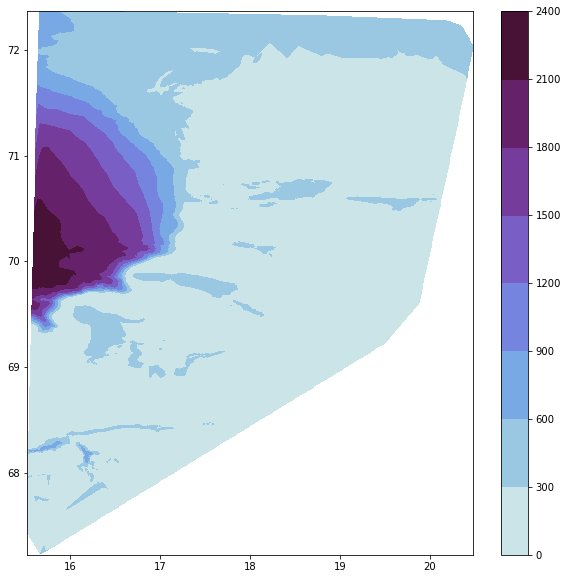

In [25]:
Z_mask = np.ma.masked_less(Z,0.1)

plt.figure(figsize=(10,10))
# Stations
plt.contourf(X,Y,Z_mask, cmap=cmocean.cm.dense)
#plt.contourf(X,Y,Z, contour_interval, colors='beige')
plt.colorbar()

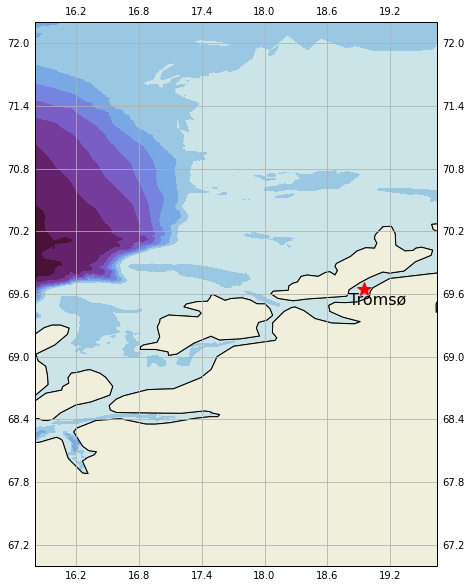

In [27]:
tromsø_lon = 18.9553
tromsø_lat = 69.6492
extent=[15.80, 19.65, 67, 72.20]

fig = plt.figure(figsize=(15,10))
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                    edgecolor='face',
                                    facecolor=cfeature.COLORS['water'])
# create map
pcar = ccrs.PlateCarree()
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.set_extent(extent, crs=pcar)

ax.coastlines(resolution='50m')

#ax.add_feature(ocean_50m)
ax.add_feature(land_50m)
ax.contourf(X,Y,Z_mask,transform=ccrs.PlateCarree(), cmap=cmocean.cm.dense)

plt.plot(tromsø_lon, tromsø_lat, 'r*',transform=ccrs.PlateCarree(), markersize=14);
plt.text(tromsø_lon-0.15, tromsø_lat-0.15, 'Tromsø', transform=ccrs.PlateCarree(), fontsize=16);


In [21]:
bathy_data = [lats, lons, bathy]
df = pd.DataFrame({'lats':lats, 'lons':lons, 'bathy':bathy})
#df.to_excel(excel_writer='C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/NordNorgeTopo_tromsoflaket.xlsx')

In [22]:
df

,lats,lons,bathy
0,69.883333,15.583333,2241.00
1,69.983333,15.783333,2162.00
2,70.033333,15.850000,2120.00
3,70.083334,15.966667,2113.00
4,70.150000,15.616667,2227.00
...,...,...,...
142837,67.368229,15.620111,6.01
142838,67.361122,15.615225,1.82
142839,67.358600,15.611043,2.49
142840,67.359397,15.605428,5.75
